In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | ayan
Processing Record 3 of Set 1 | baculin
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | brae
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | yar-sale
Processing Record 8 of Set 1 | yithion
City not found. Skipping...
Processing Record 9 of Set 1 | bathsheba
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | ahipara
Processing Record 16 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | buraydah
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | bargal
City not found. Skipping...
Processing Record 21 

Processing Record 35 of Set 4 | henties bay
Processing Record 36 of Set 4 | viligili
City not found. Skipping...
Processing Record 37 of Set 4 | lorengau
Processing Record 38 of Set 4 | meadow lake
Processing Record 39 of Set 4 | capao da canoa
Processing Record 40 of Set 4 | lerwick
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | maun
Processing Record 43 of Set 4 | hovd
Processing Record 44 of Set 4 | tautira
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | zwedru
Processing Record 47 of Set 4 | gucheng
Processing Record 48 of Set 4 | kapit
Processing Record 49 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 50 of Set 4 | katherine
Processing Record 1 of Set 5 | zhuhai
Processing Record 2 of Set 5 | jabiru
City not found. Skipping...
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | ha tinh
Processing Record 5 of Set 5 | dongying
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of 

Processing Record 25 of Set 8 | bambous virieux
Processing Record 26 of Set 8 | kathmandu
Processing Record 27 of Set 8 | lahat
Processing Record 28 of Set 8 | nova olinda do norte
Processing Record 29 of Set 8 | rawson
Processing Record 30 of Set 8 | plettenberg bay
Processing Record 31 of Set 8 | carnarvon
Processing Record 32 of Set 8 | ixtapa
Processing Record 33 of Set 8 | orsha
Processing Record 34 of Set 8 | puerto madryn
Processing Record 35 of Set 8 | karaul
City not found. Skipping...
Processing Record 36 of Set 8 | ust-nera
Processing Record 37 of Set 8 | emerald
Processing Record 38 of Set 8 | kirakira
Processing Record 39 of Set 8 | yulara
Processing Record 40 of Set 8 | cockburn town
Processing Record 41 of Set 8 | wa
City not found. Skipping...
Processing Record 42 of Set 8 | ulaangom
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | panzos
Processing Record 45 of Set 8 | hurghada
Processing Record 46 of Set 8 | sur
Processing Record 47 of Set 8 | 

Processing Record 12 of Set 12 | pinotepa nacional
Processing Record 13 of Set 12 | dingle
Processing Record 14 of Set 12 | westport
Processing Record 15 of Set 12 | ganzhou
Processing Record 16 of Set 12 | marcona
City not found. Skipping...
Processing Record 17 of Set 12 | hami
Processing Record 18 of Set 12 | duz
City not found. Skipping...
Processing Record 19 of Set 12 | senaki
Processing Record 20 of Set 12 | saint-leu
Processing Record 21 of Set 12 | srednekolymsk
Processing Record 22 of Set 12 | netarhat
Processing Record 23 of Set 12 | intipuca
Processing Record 24 of Set 12 | catamarca
Processing Record 25 of Set 12 | sangar
Processing Record 26 of Set 12 | krasnoselkup
Processing Record 27 of Set 12 | ketchikan
Processing Record 28 of Set 12 | lardos
Processing Record 29 of Set 12 | alta floresta
Processing Record 30 of Set 12 | yinchuan
Processing Record 31 of Set 12 | sehithwa
Processing Record 32 of Set 12 | dongsheng
Processing Record 33 of Set 12 | poum
Processing Recor

In [7]:
len(city_data)

556

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,72.99,76,34,4.63,RE,2021-10-21 17:49:33
1,Ayan,56.4500,138.1667,35.04,62,92,13.35,RU,2021-10-21 17:49:33
2,Baculin,7.4525,126.5842,77.67,83,98,4.34,PH,2021-10-21 17:49:33
3,Kapaa,22.0752,-159.3190,76.98,97,90,6.91,US,2021-10-21 17:49:33
4,Brae,60.3964,-1.3530,44.51,67,100,20.89,GB,2021-10-21 17:49:33
5,Ushuaia,-54.8000,-68.3000,49.62,65,75,28.77,AR,2021-10-21 17:48:17
6,Yar-Sale,66.8333,70.8333,28.56,91,31,5.50,RU,2021-10-21 17:49:34
7,Bathsheba,13.2167,-59.5167,88.41,62,75,26.46,BB,2021-10-21 17:49:34
8,Rikitea,-23.1203,-134.9692,74.46,76,100,20.69,PF,2021-10-21 17:49:34
9,Dikson,73.5069,80.5464,22.71,72,95,9.17,RU,2021-10-21 17:49:34


In [9]:
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-10-21 17:49:33,-21.3585,55.7679,72.99,76,34,4.63
1,Ayan,RU,2021-10-21 17:49:33,56.4500,138.1667,35.04,62,92,13.35
2,Baculin,PH,2021-10-21 17:49:33,7.4525,126.5842,77.67,83,98,4.34
3,Kapaa,US,2021-10-21 17:49:33,22.0752,-159.3190,76.98,97,90,6.91
4,Brae,GB,2021-10-21 17:49:33,60.3964,-1.3530,44.51,67,100,20.89
...,...,...,...,...,...,...,...,...,...
551,Kinsale,IE,2021-10-21 17:51:08,51.7075,-8.5306,49.37,76,20,9.22
552,Baykalovo,RU,2021-10-21 17:51:08,57.3981,63.7684,26.33,86,9,5.93
553,Mastic Beach,US,2021-10-21 17:51:08,40.7668,-72.8521,76.06,67,1,1.99
554,Kieta,PG,2021-10-21 17:51:08,-6.2167,155.6333,78.44,83,57,3.58


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

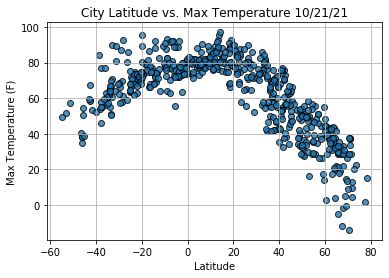

In [13]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

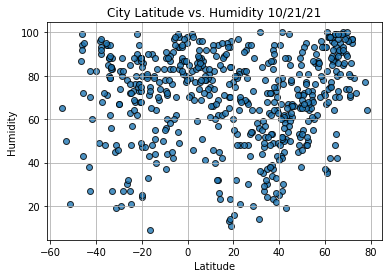

In [14]:
# Build the scatter plot for latitude vs.humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity, %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

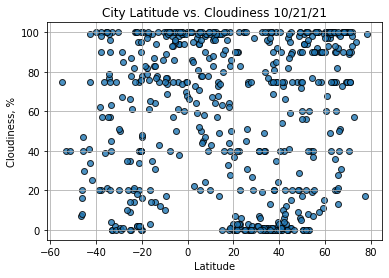

In [15]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness, %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

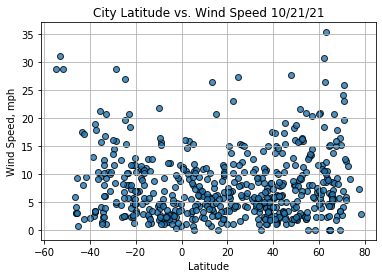

In [16]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed, mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()